Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processing, scientific visualization, algorithms and systems to extract or extrapolate knowledge from potentially noisy, structured, or unstructured data. 
Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.
Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gra

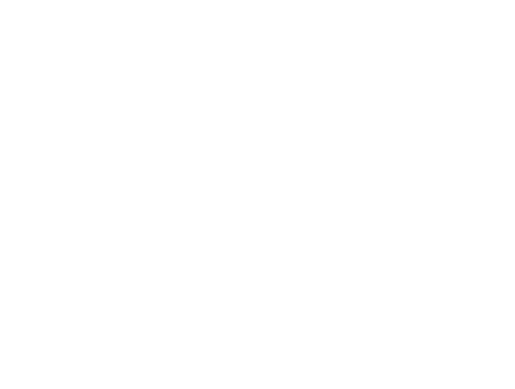

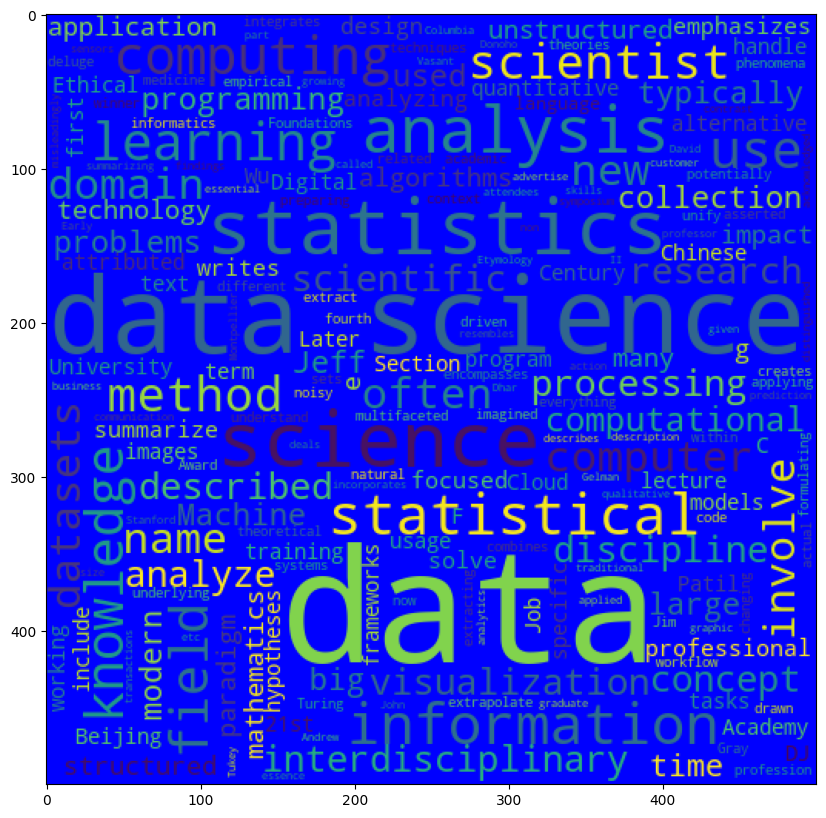

In [30]:
# Prac 1 - word Cloud
from wordcloud import WordCloud,STOPWORDS 
import matplotlib.pyplot as plt 
import wikipedia as wp 
 
result = wp.page("Data Science") 
finale = result.content 
 
print(finale) 
 
def plot_word_cloud(wordcloud): 
    plt.axis("off") 
    plt.figure(figsize=(10,10)) 
    plt.imshow(wordcloud) 
    plt.show() 
     
wordcloud = WordCloud(width=500, height=500, stopwords=STOPWORDS, 
background_color="blue",random_state=10).generate(finale) 
plot_word_cloud(wordcloud) 
wordcloud.to_file("DS1.png")



In [31]:
#prac 2 - Data Scrapping 
# HTML Scraping
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

# URL of Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_Asian_countries_by_area"

# Fetch and parse the page
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

# Find all tables and manually select the right one
tables = soup.find_all("table")

# Assuming the first relevant table is the one we need
table = tables[0]

# Lists to store data
serial_number = []
country_name = []
area = []

# Extract rows from the table body
rows = table.find("tbody").find_all("tr")

for row in rows:
    cells = row.find_all("td")
    if len(cells) >= 3:  # Ensure it has enough columns
        serial_number.append(cells[0].get_text(strip=True))  # Serial number
        country_name.append(cells[1].get_text(strip=True))  # Country name
        area.append(cells[2].get_text(strip=True).replace(",", ""))  # Area (removing commas)

# Create a DataFrame
df = pd.DataFrame({
    "Serial Number": serial_number,
    "Country Name": country_name,
    "Area (sq km)": area
})

# Display the first 10 rows
print(df.head(10))



  Serial Number  Country Name Area (sq km)
0             1        Russia        29.3%
1             2         China        21.5%
2             3         India         7.4%
3             4    Kazakhstan         5.8%
4             5  Saudi Arabia         4.8%
5             6          Iran         3.7%
6             7      Mongolia         3.5%
7             8     Indonesia         3.3%
8             9      Pakistan         2.0%
9            10        Turkey         1.7%


In [32]:
#prac 2 - Data Scrapping
# JSON Scrapping
import json 
import pandas as pd 
 
url = "https://jsonplaceholder.typicode.com/users" 
 
response = urlopen(url) 
data = json.loads(response.read()) 
 
id = [] 
username = [] 
email = [] 
 
for item in data: 
    if "id" in item.keys(): 
        id.append(item["id"]) 
    else: 
        id.append("NA") 
     
    if "username" in item.keys(): 
        username.append(item["username"]) 
    else: 
        username.append("NA") 
     
    if "email" in item.keys(): 
        email.append(item["email"]) 
    else: 
        email.append("NA") 
         
df = pd.DataFrame() 
df["ID"] = id 
df["Username"] = username 
df["Email"] = email 
df 


,ID,Username,Email
0,1,Bret,Sincere@april.biz
1,2,Antonette,Shanna@melissa.tv
2,3,Samantha,Nathan@yesenia.net
3,4,Karianne,Julianne.OConner@kory.org
4,5,Kamren,Lucio_Hettinger@annie.ca
5,6,Leopoldo_Corkery,Karley_Dach@jasper.info
6,7,Elwyn.Skiles,Telly.Hoeger@billy.biz
7,8,Maxime_Nienow,Sherwood@rosamond.me
8,9,Delphine,Chaim_McDermott@dana.io
9,10,Moriah.Stanton,Rey.Padberg@karina.biz


prac 3 - EDA (EXploratory Data Analysis)  Run line by line in R

In [ ]:

df=read.csv("mtcars.csv") 
# View(df) 
str(df) 
names(df) 
row.names(df) 
row.names(df) = df$model 
df = df[,-1] 
library(dplyr) 
 
#Select function for a range of columns 
df1 = select(df, mpg:hp) 
View(df) 
 
#Select function with multiple columns 
df1 = select(df,c(mpg, hp, wt)) 
View(df) 
 
#Select function with pipe symbol 
df1 = df %>% select(c(mpg,hp,wt)) 
View(df1) 
 
#Filter function 
df2 = df %>% filter(gear == 4 | mpg > 20) %>% select(c(mpg, gear)) 
View(df2) 
 
#Mutate Function 
df3 = df %>% mutate(Power= hp*wt) 
View(df3) 
 
 
#Rename function 
df5 = df %>% rename(MilesPerGallon=mpg, Displacement=disp) 
View(df5) 
 
#Arrange function - Sorting the dataset on the basis of columns 
df6 = df %>% arrange(cyl, desc(mpg)) 
View(df6) 
 
#Groupby and summarise function 
df6$gear = as.factor(df$gear) 
str(df6) 
df6 = df %>% group_by(df6$gear) %>% summarise(n=n(), mean_mpg = mean(mpg), 
mean_disp = mean(disp)) 
df6 
 
hist(df$mpg, main="Histogram of Miles per gallon", col = "cyan", 
border="darkorange", xlab="Miles per gallon") 
barplot(table(df$gear))  
boxplot(df$mpg) 
plot(df$mpg~df$disp)




SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (2897410680.py, line 7)

PRACTICAL 4 - EDA in python 

In [ ]:
#prac 4 - EDA 
# Load Titanic dataset (Ensure the file path is correct)
titanic = pd.read_csv("C:\\Games\\train.csv")
# Display first 5 rows
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_cleaned = titanic.drop(['Cabin', 'PassengerId', 'Name', 'Fare', 'Ticket'], axis = 1)
titanic_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


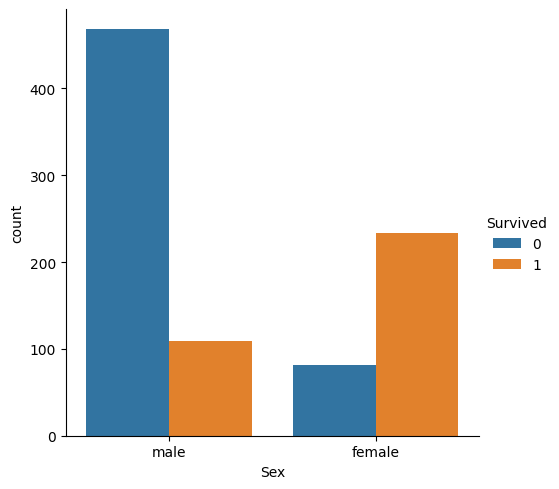

In [ ]:
sns.catplot(x="Sex", kind="count", hue="Survived", data=titanic_cleaned)



In [ ]:
titanic_cleaned.groupby(['Sex', 'Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='Sex'>

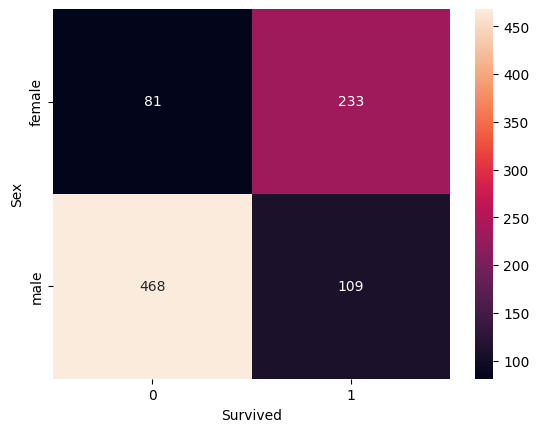

In [ ]:
group1 = titanic_cleaned.groupby(['Sex', 'Survived'])
gender_survived = group1.size().unstack()
sns.heatmap(gender_survived, annot=True, fmt="d")


<Axes: xlabel='Survived', ylabel='Sex'>

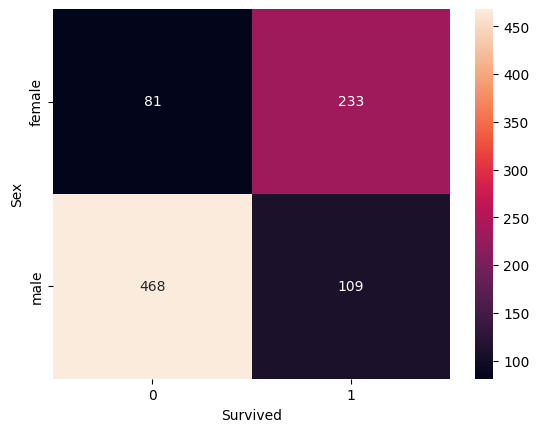

In [ ]:
group2 = titanic_cleaned.groupby(['Sex', 'Survived'])
p_survived = group2.size().unstack()
sns.heatmap(p_survived, annot=True, fmt="d")


In [ ]:
import pandas as pd

# Define the function to impute missing Age values based on Pclass
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):  # Check if Age is missing
        if Pclass == 1:
            return 38  # Average Age for 1st class
        elif Pclass == 2:
            return 29  # Average Age for 2nd class
        else:
            return 24  # Average Age for 3rd class
    else:
        return Age  # Keep existing Age if not missing

titanic_cleaned['Age'] = titanic_cleaned[['Age', 'Pclass']].apply(impute, axis=1)
titanic_cleaned.isnull().sum()

C:\Users\bhush\AppData\Local\Temp\ipykernel_21164\1114494545.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\bhush\AppData\Local\Temp\ipykernel_21164\1114494545.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [ ]:
titanic_cleaned.corr(method='pearson')

ValueError: could not convert string to float: 'male'

In [ ]:
sns.heatmap(titanic_cleaned.corr(method='pearson'), annot=True, vmax=1)


ValueError: could not convert string to float: 'male'

PRACTICAL 5 - Linear Regression

In [96]:
#Prac 5 - linear Regression
from sklearn import datasets
import numpy as np


In [97]:
x, y, coef = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)
x = np.interp(x, (x.min(), x.max()), (0, 20))

print(len(x))
print(x)


100
[[ 9.09621765]
 [14.63742853]
 [12.25580785]
 [ 7.21515957]
 [ 6.90562848]
 [12.42799856]
 [ 6.53450315]
 [12.36358975]
 [11.45101022]
 [ 9.29527704]
 [ 8.46897323]
 [11.11359701]
 [ 4.21646281]
 [ 8.92109838]
 [13.29785748]
 [15.47570863]
 [ 9.84113925]
 [17.99332461]
 [16.61818648]
 [ 7.74737185]
 [14.6461329 ]
 [18.44957388]
 [ 8.7705892 ]
 [11.88558736]
 [13.74332637]
 [13.81155569]
 [18.67718793]
 [11.97104337]
 [ 9.14449312]
 [16.94375093]
 [ 6.87377602]
 [ 8.18679147]
 [ 6.2389242 ]
 [12.15553663]
 [10.63083424]
 [12.50645606]
 [11.18464153]
 [ 8.9153091 ]
 [10.80270889]
 [ 5.39192765]
 [14.96011903]
 [12.24674897]
 [ 3.51136012]
 [19.8803112 ]
 [11.3230796 ]
 [ 9.73649581]
 [15.68932604]
 [ 7.0453415 ]
 [17.90284439]
 [12.29004918]
 [ 6.82470934]
 [ 4.69845289]
 [12.51840023]
 [14.32303265]
 [15.31240374]
 [12.25434694]
 [12.19178147]
 [ 3.42836832]
 [16.68074531]
 [ 9.811036  ]
 [ 6.97608048]
 [11.84164639]
 [15.57357937]
 [ 2.37289516]
 [ 0.        ]
 [ 4.55601227]
 [10.4

In [98]:
y = np.interp(y, (y.min(), y.max()), (20000, 150000))
print(len(y))
print(y)


100
[ 78311.16075377 103897.6645258   97836.26101499  80550.25638039
  68555.820963   108021.44227128  55778.0199934  101586.97979347
 103966.61856971  76826.00913959  73657.03907056  96439.33831133
  43282.85644907  73119.73495559 109692.0380975  128125.74670244
  87499.26503386 136438.82955292 140414.06203468  75920.22641562
 122765.94046351 138676.79599883  90840.21480164  99453.36502726
 118663.17132396 125247.52951645 144470.99004202  98454.6493064
  92321.3919241  133162.35931048  61723.07434352  77095.35501897
  59042.68149761 109559.00643186  77206.62874325 109743.44545302
 103902.53136675  82585.66146856  81088.97054957  62200.35300958
 111971.74647069 101515.0451792   47090.60230288 141613.36480828
  99370.060872    72953.14343772 131312.34257614  68957.25418311
 135509.14233685  90658.86260334  75147.59074288  46071.12989863
  91128.91843553 105126.42548023 118217.9745179  102729.79197702
  90792.28592931  31126.14409027 131792.50158722  87540.54488213
  68478.3452966   9470

Text(0.5, 1.0, 'Experience vs Salary')

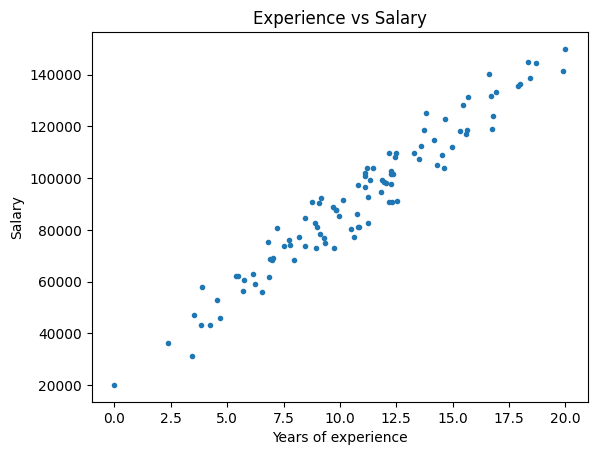

In [99]:
import matplotlib.pyplot as plt

plt.plot(x, y, '.', label="Training data")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")



Text(0.5, 1.0, 'Experience vs Salary')

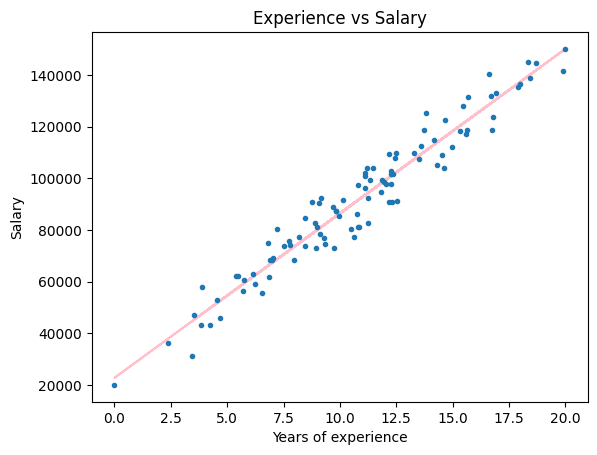

In [100]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(x, y)
y_predicted = reg_model.predict(x)

plt.plot(x, y_predicted, color="pink")
plt.plot(x, y, '.', label="Training data")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")



In [101]:
import pandas as pd

data = {"Experience": np.round(x.flatten()), "Salary": np.round(y)}
df = pd.DataFrame(data)
df.head(10)


,Experience,Salary
0,9.0,78311.0
1,15.0,103898.0
2,12.0,97836.0
3,7.0,80550.0
4,7.0,68556.0
5,12.0,108021.0
6,7.0,55778.0
7,12.0,101587.0
8,11.0,103967.0
9,9.0,76826.0


[143740.]


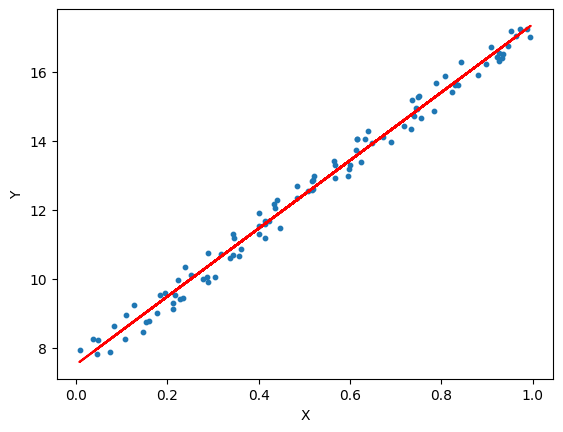

In [102]:
x1 = [[19]]
y1 = reg_model.predict(x1)
print(np.round(y1))

reg_model1 = LinearRegression()
x = np.random.rand(100, 1)
b0 = 7
b1 = 10
e=np.random.rand(100,1)
y = b0 + b1 * x+e

reg_model1.fit(x, y)
y_predicted = reg_model1.predict(x)

plt.scatter(x, y, s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y_predicted, color="red")
plt.show()




 Prac 6 - Multiple Linear Regression 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression

boston = pd.read_csv("C:\\Users\\CSLAB\\Documents\\Untitled Folder\\Boston.csv")
boston.head()


In [ ]:
boston.info()


In [ ]:
boston = boston.drop(columns="Unnamed: 0")


In [ ]:
boston.info()

In [ ]:
boston_x = pd.DataFrame(boston.iloc[:, :13])  # Selecting the first 13 columns as features
boston_y = pd.DataFrame(boston.iloc[:, -1])   # Selecting the last column as the target variable

X_train, X_test, Y_train, Y_test = train_test_split(boston_x, boston_y, test_size=0.3)

print(f"xtrain shape : {X_train.shape}")
print(f"ytrain shape : {Y_train.shape}")
print(f"xtest shape : {X_test.shape}")
print(f"ytest shape : {Y_test.shape}")


In [ ]:
reg_model = LinearRegression()  # Creating a linear regression model
reg_model.fit(X_train, Y_train)  # Training the model on the training data

Y_pred_raw = reg_model.predict(X_test)  # Making predictions on the test data
Y_pred_df = pd.DataFrame(Y_pred_raw, columns=["Predicted"])  # Storing predictions in a DataFrame

Y_pred_df.head()  # Displaying the first few predicted values


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_pred_raw, c="red")  # Scatter plot of actual vs predicted values
plt.xlabel("Actual Price (medv)")  # Label for the x-axis
plt.ylabel("Predicted Price (medv)")  # Label for the y-axis
plt.title("Actual vs Predicted Price")  # Title of the plot
plt.show()  # Display the plot


 PRactical 7 - Decision Tree Classification (Run in R line by line)
 
#Click on the three dots on the right most side -> Select folder with your csv file -> Click on More -> set as working directory
#Packages (right side of the screen) -> enter “dplyr” in input box and run


In [ ]:
titanic = read.csv("train.csv") 
View(titanic) 
dim(titanic) 
str(titanic) 
library(dplyr) 
cleaned_titanic = titanic %>% select(-c("Cabin","Ticket", "Fare", "Name", "PassengerId" )) 
dim(cleaned_titanic) 
str(cleaned_titanic) 
cleaned_titanic = cleaned_titanic %>% mutate(Pclass=factor(Pclass, levels=c(1,2,3), 
labels=c("Upper","Middle","Lower")), Survived = factor(Survived, levels = c(0,1),
labels = c("Not Survived", "Survived"))) 
str(cleaned_titanic) 
View(cleaned_titanic) 
cleaned_titanic = na.omit(cleaned_titanic) 
str(cleaned_titanic) 
dt = sort(sample(nrow(cleaned_titanic),nrow(cleaned_titanic) * 0.7)) 
titanic_train = cleaned_titanic[dt,] 
titanic_test = cleaned_titanic[-dt,] 
dim(titanic_train) 
dim(titanic_test)
# Packages (right side of the screen) -> enter “rpart” in input box and run
library(rpart) 
library(rpart.plot) 
titanic_model = rpart(Survived~.,data = titanic_train, method = "class") 
rpart.plot(titanic_model, extra = 106) 
predict_unseen = predict(titanic_model, titanic_test ,type = "class") 
predict_unseen 
library(caret) 
con_mat = confusionMatrix(titanic_test$Survived, predict_unseen)


Practical 8 - Knn

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()



In [ ]:

dataset = load_breast_cancer()
dataframe_x = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataframe_x = dataframe_x[["mean area", "mean compactness"]]
dataframe_x.head()
dataframe_y = pd.Categorical.from_codes(dataset.target, dataset.target_names)
dataframe_y = pd.get_dummies(dataframe_y, drop_first=True, dtype=int)
print(dataframe_y)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataframe_x, dataframe_y, random_state=1)

# Creating knn model
knn_model = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_model.fit(x_train, y_train)




In [ ]:
sns.scatterplot(x="mean area", y="mean compactness", hue="benign", data=x_test.join(y_test, how="outer"))




In [ ]:
y_pred = knn_model.predict(x_test)
plot.scatter(x_test["mean area"], x_test["mean compactness"], c=y_pred, cmap="coolwarm", alpha=0.7)



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)



In [ ]:
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
labels = np.asarray(labels).reshape(2,2)
categories = ["Zero", "One"]
ax = plot.subplot()
sns.heatmap(conf_mat, annot=True, ax=ax)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Malignant", "Benign"])
ax.yaxis.set_ticklabels(["Malignant", "Benign"])



In [ ]:

tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).reshape(-1)
print(f"True Positive: {tp}\nTrue Negative: {tn}\nFalse Positive: {fp}\nTrue Negative: {tn}")

accuracy = (tp + tn) / (tp + tn + fp + fn)
print(accuracy)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred)



Practical 9 - Mongo DB (compauny database)


In [ ]:
db.Staff.insertMany([
    { empid: 101, empname: "Nikita", salary: 90000, designation: "Data Scientist" },
    { empid: 102, empname: "Abina", salary: 70000, designation: "Data Analyst" },
    { empid: 103, empname: "Abijah", salary: 50000, designation: "HR" },
    { empid: 104, empname: "Sakshi", salary: 60000, designation: "Dept Head" },
    { empid: 105, empname: "Aishwarya", salary: 80000, designation: "Manager" },
    { empid: 106, empname: "Sara", salary: 60000, designation: "HR" },
    { empid: 107, empname: "Rohit", salary: 90000, designation: "Data Scientist" },
    { empid: 108, empname: "Amit", salary: 75000, designation: "Software Engineer" },
    { empid: 109, empname: "Vikas", salary: 55000, designation: "Marketing Executive" },
    { empid: 110, empname: "Pooja", salary: 95000, designation: "Project Manager" }
])


In [ ]:
db.Staff.find({}, { empid: 1, designation: 1, _id: 0 })



In [ ]:
db.Staff.find().sort({ Salary: -1 })


In [ ]:
db.Staff.find({ $or: [ { designation: "Manager" }, { Salary: { $gt: 50000 } } ] })



In [ ]:
db.Staff.updateMany({ designation: "Accountant" }, { $set: { Salary: 45000 } })


In [ ]:
db.Staff.deleteMany({ Salary: { $gt: 100000 } })

In [ ]:
# Display all documents in the Student collection.
db.Student.find()

2. Sort the documents in descending order of TotalMarks.
db.Student.find().sort({ TotalMarks: -1 })

3. Display students from Class "MSc" or TotalMarks greater than 400.
db.Student.find({ $or: [ { Class: "MSc" }, { TotalMarks: { $gt: 400 } } ] })

4. Remove all documents where TotalMarks < 200.
db.Student.deleteMany({ TotalMarks: { $lt: 200 } })
